## Simple Spam Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.tsv", sep="\t")

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
# Checking null values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
# checking number of ham and spam present
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

It is an Imbalanced dataset, so we need to first make it balanced.

### Balancing the Dataset

In [7]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [10]:
# Randomly Selecting 747 rows of ham
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape

(747, 4)

In [12]:
# Now appending ham and spam
data = ham.append(spam, ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Nowadays people are notixiquating the laxinorf...,274,12
1,ham,I uploaded mine to Facebook,27,0
2,ham,hanks lotsly!,13,1
3,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",120,6
4,ham,Gal n boy walking in d park. gal-can i hold ur...,160,13


In [13]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis

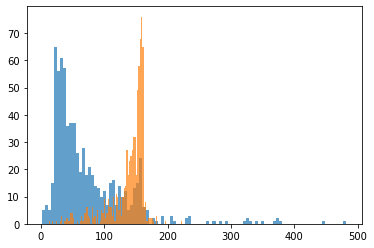

In [15]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

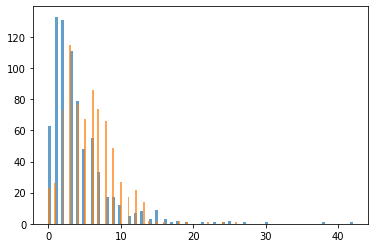

In [16]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

Highly overlapping, no information can be gathered

### Preparing the data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Splitting the data
X = data['message']
y = data['label']
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,
                                shuffle = True, stratify = y)

In [19]:
x_train.shape, x_test.shape

((1045,), (449,))

### Bag of word

In [20]:
vectorizer = TfidfVectorizer()

In [21]:
x_train = vectorizer.fit_transform(x_train)

In [22]:
x_train.shape

(1045, 3721)

### Pipline and Random Forest

In [23]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
            ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-100))])

In [26]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [27]:
y_pred = clf.predict(x_test)

In [29]:
print(confusion_matrix(y_test, y_pred))

[[222   3]
 [ 23 201]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.94       225
        spam       0.99      0.90      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [31]:
print(accuracy_score(y_test, y_pred))

0.9420935412026726


### Predicting some real messages

In [32]:
clf.predict(["congratulations! you are shortlisted for the preliminary interview round"])

array(['ham'], dtype=object)

In [34]:
clf.predict(["Hurray! yow have won free air tickets to Singapore. Text 'WON' to 556677"])

array(['spam'], dtype=object)

In [35]:
clf.predict(["This is a very simple spam classification using nlp"])

array(['ham'], dtype=object)

### Pipline and SVM

In [45]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
            ('clf', SVC(C = 2000, gamma='auto'))])

In [46]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=2000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [47]:
y_pred = clf.predict(x_test)

In [48]:
print(confusion_matrix(y_test, y_pred))

[[221   4]
 [ 20 204]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       225
        spam       0.98      0.91      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [50]:
print(accuracy_score(y_test, y_pred))

0.9465478841870824


### Prediction

In [51]:
clf.predict(["congratulations! you are shortlisted for the preliminary interview round"])

array(['ham'], dtype=object)

In [52]:
clf.predict(["Hurray! yow have won free air tickets to Singapore. Text 'WON' to 556677"])

array(['spam'], dtype=object)

In [53]:
clf.predict(["This is a very simple spam classification using nlp"])

array(['ham'], dtype=object)

## Summary

- SVM classifier works better than Random Forest classifier